In [1]:
import os
import numpy as np
# File manipulation
from glob import glob

import matplotlib.pyplot as plt
import matplotlib as mpl

import rasterio as rio
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
from PIL import Image


In [2]:
os.chdir(os.path.join(et.io.HOME, 'project1'))

In [3]:
mpl.rcParams['figure.figsize'] = (20, 20)
mpl.rcParams['axes.titlesize'] = 15

In [4]:
def color_image_show(img, title):
    """
    Show image
    Input:
    img - 3D array of uint16 type
    title - string
    """
    fig = plt.figure(figsize=(10, 10))
    fig.set_facecolor('white')
    plt.imshow(img/65535)
    plt.title(title)
    plt.show()


In [5]:
!ls data

LC08_L1TP_044034_20181226_20190129_01_T1_ANG.txt
LC08_L1TP_044034_20181226_20190129_01_T1_B10.TIF
LC08_L1TP_044034_20181226_20190129_01_T1_B11.TIF
LC08_L1TP_044034_20181226_20190129_01_T1_B1.TIF
LC08_L1TP_044034_20181226_20190129_01_T1_B2.TIF
LC08_L1TP_044034_20181226_20190129_01_T1_B3.TIF
LC08_L1TP_044034_20181226_20190129_01_T1_B4.TIF
LC08_L1TP_044034_20181226_20190129_01_T1_B5.TIF
LC08_L1TP_044034_20181226_20190129_01_T1_B6.TIF
LC08_L1TP_044034_20181226_20190129_01_T1_B7.TIF
LC08_L1TP_044034_20181226_20190129_01_T1_B8.TIF
LC08_L1TP_044034_20181226_20190129_01_T1_B9.TIF
LC08_L1TP_044034_20181226_20190129_01_T1_BQA.TIF
LC08_L1TP_044034_20181226_20190129_01_T1_MTL.txt


In [14]:
all_landsat_post_bands = glob("data/*B*.TIF")
all_landsat_post_bands

['data/LC08_L1TP_044034_20181226_20190129_01_T1_B11.TIF',
 'data/LC08_L1TP_044034_20181226_20190129_01_T1_B2.TIF',
 'data/LC08_L1TP_044034_20181226_20190129_01_T1_B7.TIF',
 'data/LC08_L1TP_044034_20181226_20190129_01_T1_B9.TIF',
 'data/LC08_L1TP_044034_20181226_20190129_01_T1_B3.TIF',
 'data/LC08_L1TP_044034_20181226_20190129_01_T1_B6.TIF',
 'data/LC08_L1TP_044034_20181226_20190129_01_T1_B10.TIF',
 'data/LC08_L1TP_044034_20181226_20190129_01_T1_B1.TIF',
 'data/LC08_L1TP_044034_20181226_20190129_01_T1_B5.TIF',
 'data/LC08_L1TP_044034_20181226_20190129_01_T1_B8.TIF',
 'data/LC08_L1TP_044034_20181226_20190129_01_T1_BQA.TIF',
 'data/LC08_L1TP_044034_20181226_20190129_01_T1_B4.TIF']

In [15]:
len("data/LC08_L1TP_044034_20181226_20190129_01_T1_B")
# len("data/LC08_L1TP_044034_20181226_20190129_01_T1_B11")

47

In [16]:
all_landsat_post_bands.sort()
all_landsat_post_bands

['data/LC08_L1TP_044034_20181226_20190129_01_T1_B1.TIF',
 'data/LC08_L1TP_044034_20181226_20190129_01_T1_B10.TIF',
 'data/LC08_L1TP_044034_20181226_20190129_01_T1_B11.TIF',
 'data/LC08_L1TP_044034_20181226_20190129_01_T1_B2.TIF',
 'data/LC08_L1TP_044034_20181226_20190129_01_T1_B3.TIF',
 'data/LC08_L1TP_044034_20181226_20190129_01_T1_B4.TIF',
 'data/LC08_L1TP_044034_20181226_20190129_01_T1_B5.TIF',
 'data/LC08_L1TP_044034_20181226_20190129_01_T1_B6.TIF',
 'data/LC08_L1TP_044034_20181226_20190129_01_T1_B7.TIF',
 'data/LC08_L1TP_044034_20181226_20190129_01_T1_B8.TIF',
 'data/LC08_L1TP_044034_20181226_20190129_01_T1_B9.TIF',
 'data/LC08_L1TP_044034_20181226_20190129_01_T1_BQA.TIF']

In [11]:
for i in range(len(all_landsat_post_bands)):
    print("index", i, "\tband", all_landsat_post_bands[i][47:-4])

index 0 	band 1
index 1 	band 10
index 2 	band 11
index 3 	band 2
index 4 	band 3
index 5 	band 4
index 6 	band 5
index 7 	band 6
index 8 	band 7
index 9 	band 8
index 10 	band 9
index 11 	band QA


In [73]:
bands_needed_ind = [3, 4, 5, 6]
all_needed_bands = []

In [74]:
st = (str)(all_landsat_post_bands[11][5:-4]) + "_resized.TIFF"
st

'LC08_L1TP_044034_20181226_20190129_01_T1_BQA_resized.TIFF'

In [75]:
for i in bands_needed_ind:
    im = Image.open(all_landsat_post_bands[i])
    new_im = im.resize((500, 500))
    st = (str)(all_landsat_post_bands[i][5:-4]) + "_resized.TIFF"
    new_im.save(st)
    all_needed_bands.append(st)

In [17]:
all_needed_bands

NameError: name 'all_needed_bands' is not defined

In [50]:
!ls

data
LC08_L1TP_044034_20181226_20190129_01_T1_B2_resized.TIFF
LC08_L1TP_044034_20181226_20190129_01_T1_B3_resized.TIFF
LC08_L1TP_044034_20181226_20190129_01_T1_B4_resized.TIFF
LC08_L1TP_044034_20181226_20190129_01_T1_B5_resized.TIFF
output


In [60]:
all_tiffs = glob("temp/*B*.TIF")
all_tiffs

[]

In [28]:
dataset = rio.open(all_landsat_post_bands[11])
print(dataset.name)
print(dataset.colorinterp)

data/LC08_L1TP_044034_20181226_20190129_01_T1_BQA.TIF
(<ColorInterp.gray: 1>,)


In [25]:
dataset.count

1

In [77]:
with rio.open(all_needed_bands[0]) as src:
    landsat_band4 = src.read()
    


/home/dilara/anaconda3/envs/earth-analytics-python/lib/python3.6/site-packages/rasterio/__init__.py:216: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, **kwargs)


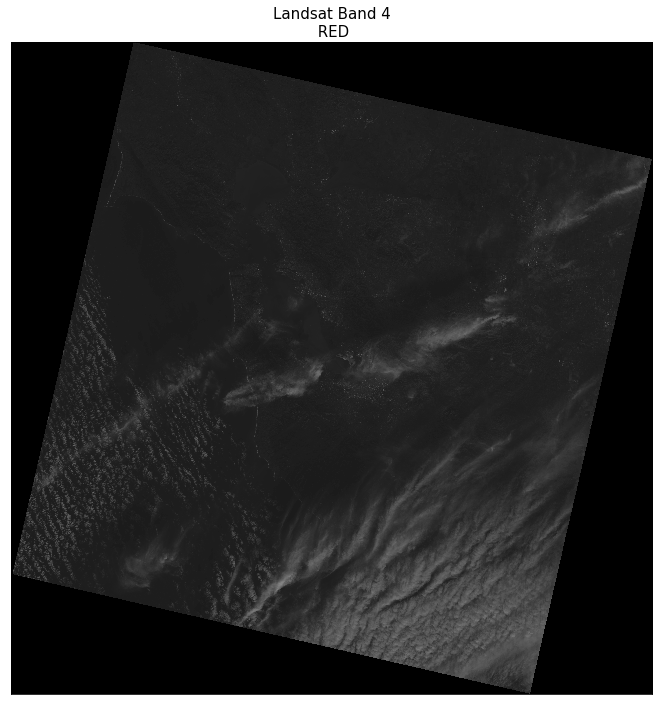

In [11]:
with rio.open(all_landsat_post_bands[5]) as src:
    landsat_band4 = src.read()
es.plot_bands(landsat_band4[0],
              title="Landsat Band 4\n RED",
              cmap="Greys_r")
plt.show()

In [12]:
landsat_post_fire_path = "output/landsat_post_fire.tif"
# This will create a new stacked raster with all bands
land_stack, land_meta = es.stack_raster_tifs(all_landsat_post_bands,
                                             landsat_post_fire_path)

In [13]:
with rio.open(landsat_post_fire_path) as src:
    landsat_post_fire = src.read()

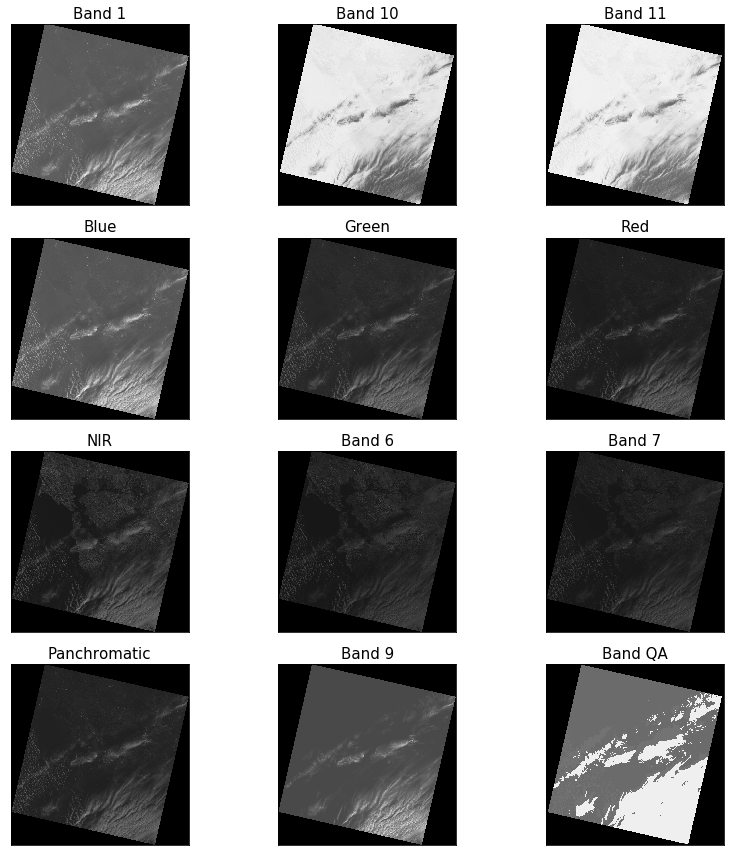

In [14]:
band_titles = ["Band 1", "Band 10", "Band 11", "Blue", "Green",
               "Red", "NIR", "Band 6", "Band 7", "Panchromatic", "Band 9", "Band QA"]
es.plot_bands(landsat_post_fire, title=band_titles,
              cmap="Greys_r")
plt.show()

In [16]:
es.plot_rgb(landsat_post_fire, rgb=[5,4,3], stretch=True,
            str_clip=1)
plt.show()

MemoryError: 

In [ ]:
with rio.open(landsat_post_fire_path[3]) as src:
    b1 = src.read()